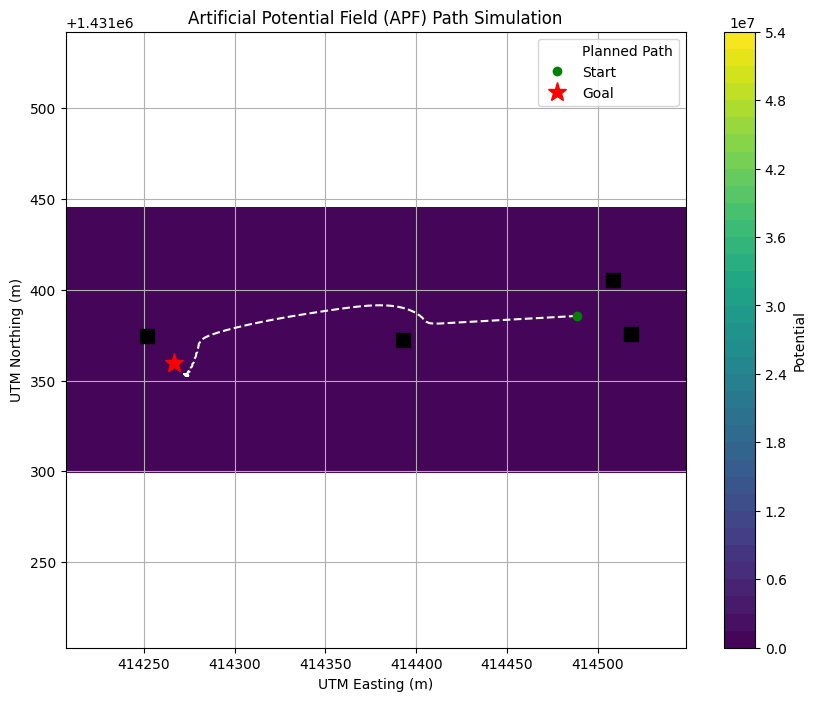

Interactive APF path map saved as 'APF_path_simulation_map.html'


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import pyproj

# ============================ CONFIGURATION ============================

# Real start and goal coordinates (given by user)
gps_start = (12.946811, 80.211638)
gps_goal  = (12.946568, 80.209597)

# Convert to UTM for computation
proj = pyproj.Proj(proj='utm', zone=44, ellps='WGS84')
utm_start = np.array(proj(gps_start[1], gps_start[0]))
utm_goal  = np.array(proj(gps_goal[1], gps_goal[0]))

# Simulated obstacles in UTM (placed between start and goal logically)
obstacles = [
    utm_start + [20, 20],
    utm_start + [30, -10],
    (utm_start + utm_goal) / 2 + [15, 0],
    utm_goal + [-15, 15]
]

# Grid settings
grid_size = 300
margin = 60
x = np.linspace(min(utm_start[0], utm_goal[0]) - margin, max(utm_start[0], utm_goal[0]) + margin, grid_size)
y = np.linspace(min(utm_start[1], utm_goal[1]) - margin, max(utm_start[1], utm_goal[1]) + margin, grid_size)
X, Y = np.meshgrid(x, y)

# ============================ POTENTIAL FIELD ============================

def potential_field(X, Y, goal, obstacles, k_att=1.0, k_rep=1e6, d0=40):
    U_att = 0.5 * k_att * ((X - goal[0])**2 + (Y - goal[1])**2)
    U_rep = np.zeros_like(U_att)
    for obs in obstacles:
        dist = np.sqrt((X - obs[0])**2 + (Y - obs[1])**2)
        mask = dist < d0
        U_rep[mask] += 0.5 * k_rep * (1.0 / dist[mask] - 1.0 / d0)**2
    return U_att + U_rep

U = potential_field(X, Y, utm_goal, obstacles)

# ============================ APF SIMULATION ============================

def apf_path(start, goal, U, X, Y, alpha=0.8, max_steps=1000, tol=5):
    pos = np.array(start)
    path = [pos.copy()]
    for _ in range(max_steps):
        ix = np.argmin(np.abs(X[0] - pos[0]))
        iy = np.argmin(np.abs(Y[:,0] - pos[1]))
        grad_y, grad_x = np.gradient(U)
        fx = -grad_x[iy, ix]
        fy = -grad_y[iy, ix]
        f = np.array([fx, fy])
        f = f / (np.linalg.norm(f) + 1e-6)
        pos += alpha * f
        path.append(pos.copy())
        if np.linalg.norm(pos - goal) < tol:
            break
    return np.array(path)

path = apf_path(utm_start, utm_goal, U, X, Y)

# ============================ PLOT IN UTM ============================

plt.figure(figsize=(10, 8))
cont = plt.contourf(X, Y, U, levels=50, cmap='viridis')
plt.plot(path[:,0], path[:,1], 'w--', label='Planned Path')
plt.plot(utm_start[0], utm_start[1], 'go', label='Start')
plt.plot(utm_goal[0], utm_goal[1], 'r*', markersize=14, label='Goal')
for obs in obstacles:
    plt.plot(obs[0], obs[1], 'ks', markersize=10)
plt.colorbar(cont, label='Potential')
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("Artificial Potential Field (APF) Path Simulation")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

# ============================ INTERACTIVE MAP ============================

# Convert UTM path back to GPS
inv_proj = pyproj.Transformer.from_proj(proj, pyproj.Proj(proj="latlong", datum="WGS84"), always_xy=True)
gps_path = [inv_proj.transform(pt[0], pt[1])[::-1] for pt in path]

# Create folium map
mid_lat = (gps_start[0] + gps_goal[0]) / 2
mid_lon = (gps_start[1] + gps_goal[1]) / 2
m = folium.Map(location=[mid_lat, mid_lon], zoom_start=19)
MarkerCluster().add_to(m)

folium.Marker(location=gps_start, popup="Start", icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=gps_goal, popup="Goal", icon=folium.Icon(color='red')).add_to(m)

folium.PolyLine(gps_path, color="blue", weight=4.5, opacity=0.8, tooltip="Planned APF Path").add_to(m)

for obs in obstacles:
    obs_gps = inv_proj.transform(obs[0], obs[1])[::-1]
    folium.CircleMarker(location=obs_gps, radius=4, color='black', fill=True, popup='Obstacle').add_to(m)

m.save('APF_path_simulation_map.html')
print("Interactive APF path map saved as 'APF_path_simulation_map.html'")


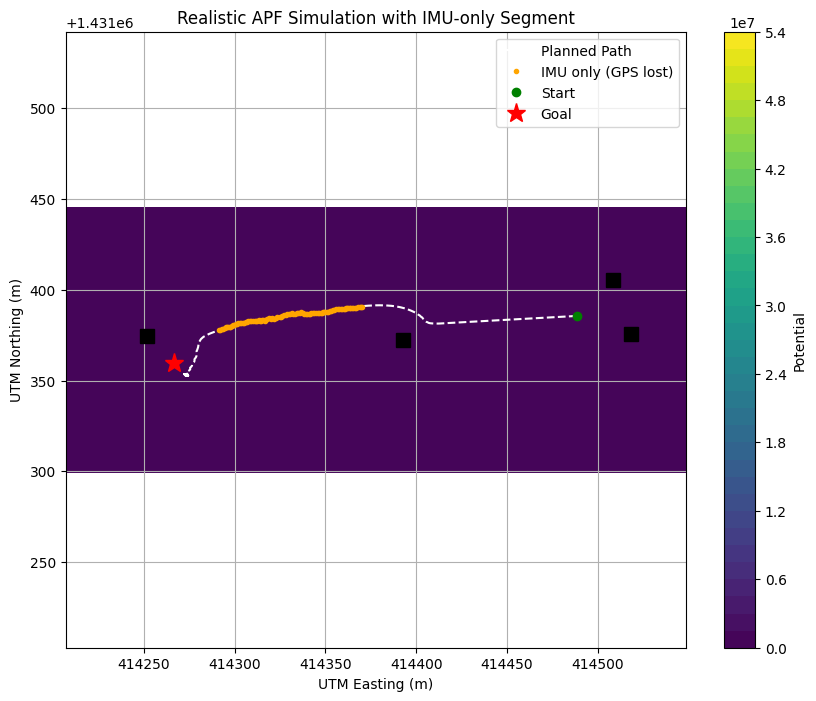

✅ Interactive APF path map saved as 'APF_path_simulation_map.html'


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import pyproj
from IPython.display import IFrame
# ======================== CONFIGURATION =========================
gps_start = (12.946811, 80.211638)
gps_goal  = (12.946568, 80.209597)

proj = pyproj.Proj(proj='utm', zone=44, ellps='WGS84')
utm_start = np.array(proj(gps_start[1], gps_start[0]))
utm_goal  = np.array(proj(gps_goal[1], gps_goal[0]))

obstacles = [
    utm_start + [20, 20],
    utm_start + [30, -10],
    (utm_start + utm_goal) / 2 + [15, 0],
    utm_goal + [-15, 15]
]

grid_size = 300
margin = 60
x = np.linspace(min(utm_start[0], utm_goal[0]) - margin, max(utm_start[0], utm_goal[0]) + margin, grid_size)
y = np.linspace(min(utm_start[1], utm_goal[1]) - margin, max(utm_start[1], utm_goal[1]) + margin, grid_size)
X, Y = np.meshgrid(x, y)

# ======================== POTENTIAL FIELD =========================

def potential_field(X, Y, goal, obstacles, k_att=1.0, k_rep=1e6, d0=40):
    U_att = 0.5 * k_att * ((X - goal[0])**2 + (Y - goal[1])**2)
    U_rep = np.zeros_like(U_att)
    for obs in obstacles:
        dist = np.sqrt((X - obs[0])**2 + (Y - obs[1])**2)
        mask = dist < d0
        with np.errstate(divide='ignore'):
            U_rep[mask] += 0.5 * k_rep * (1.0 / dist[mask] - 1.0 / d0)**2
    return U_att + U_rep

U = potential_field(X, Y, utm_goal, obstacles)

# ======================== APF + IMU SIMULATION =========================

def apf_with_imu_sim(start, goal, U, X, Y, alpha=0.8, max_steps=1000, tol=5, imu_range=(150, 250)):
    pos = np.array(start)
    path = [pos.copy()]
    imu_only_points = []
    grad_y, grad_x = np.gradient(U)

    for step in range(max_steps):
        ix = np.argmin(np.abs(X[0] - pos[0]))
        iy = np.argmin(np.abs(Y[:, 0] - pos[1]))

        fx = -grad_x[iy, ix]
        fy = -grad_y[iy, ix]
        f = np.array([fx, fy])
        f = f / (np.linalg.norm(f) + 1e-6)

        if imu_range[0] <= step <= imu_range[1]:
            noise = np.random.randn(2) * 0.2
            pos += alpha * f + noise
            imu_only_points.append(pos.copy())
        else:
            pos += alpha * f

        path.append(pos.copy())
        if np.linalg.norm(pos - goal) < tol:
            break

    return np.array(path), np.array(imu_only_points)

path, imu_only_section = apf_with_imu_sim(utm_start, utm_goal, U, X, Y)

# ======================== UTM PLOT =========================

plt.figure(figsize=(10, 8))
cont = plt.contourf(X, Y, U, levels=50, cmap='viridis')
plt.plot(path[:,0], path[:,1], 'w--', label='Planned Path')
if len(imu_only_section) > 0:
    plt.plot(imu_only_section[:,0], imu_only_section[:,1], 'o', color='orange', markersize=3, label='IMU only (GPS lost)')
plt.plot(utm_start[0], utm_start[1], 'go', label='Start')
plt.plot(utm_goal[0], utm_goal[1], 'r*', markersize=14, label='Goal')
for obs in obstacles:
    plt.plot(obs[0], obs[1], 'ks', markersize=10)
plt.colorbar(cont, label='Potential')
plt.xlabel("UTM Easting (m)")
plt.ylabel("UTM Northing (m)")
plt.title("Realistic APF Simulation with IMU-only Segment")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

# ======================== INTERACTIVE MAP =========================

inv_proj = pyproj.Transformer.from_proj(proj, pyproj.Proj(proj="latlong", datum="WGS84"), always_xy=True)
gps_path = [inv_proj.transform(pt[0], pt[1])[::-1] for pt in path]

mid_lat = (gps_start[0] + gps_goal[0]) / 2
mid_lon = (gps_start[1] + gps_goal[1]) / 2
m = folium.Map(location=[mid_lat, mid_lon], zoom_start=19)
MarkerCluster().add_to(m)

folium.Marker(location=gps_start, popup="Start", icon=folium.Icon(color='green')).add_to(m)
folium.Marker(location=gps_goal, popup="Goal", icon=folium.Icon(color='red')).add_to(m)

folium.PolyLine(gps_path, color="blue", weight=4.5, opacity=0.8, tooltip="Planned APF Path").add_to(m)

if len(imu_only_section) > 0:
    imu_path_gps = [inv_proj.transform(pt[0], pt[1])[::-1] for pt in imu_only_section]
    folium.PolyLine(imu_path_gps, color="orange", weight=4, opacity=0.6, tooltip="IMU Only Path").add_to(m)

for obs in obstacles:
    obs_gps = inv_proj.transform(obs[0], obs[1])[::-1]
    folium.CircleMarker(location=obs_gps, radius=4, color='black', fill=True, popup='Obstacle').add_to(m)

m.save('APF_path_simulation_map.html')
print("✅ Interactive APF path map saved as 'APF_path_simulation_map.html'")


In [51]:
print("\n=== DETAILED FORCE ANALYSIS ALONG THE PATH ===\n")
k_att = 1.0
k_rep = 1e6
d0 = 40

for i, pos in enumerate(path):
    att_force = -k_att * (pos - utm_goal)

    rep_force_total = np.array([0.0, 0.0])
    for j, obs in enumerate(obstacles):
        dist = np.linalg.norm(pos - obs)
        if dist < d0:
            direction = (pos - obs) / (dist + 1e-6)
            rep_mag = k_rep * (1.0 / dist - 1.0 / d0) * (1.0 / dist**2)
            rep_force = rep_mag * direction
            rep_force_total += rep_force

            print(f"[Step {i}] Obstacle {j+1} at {obs}")
            print(f"   Distance to obstacle: {dist:.2f} < {d0} (active)")
            print(f"   Repulsive force: {rep_force} (mag={np.linalg.norm(rep_force):.2f})")
        else:
            print(f"[Step {i}] Obstacle {j+1} at {obs} — too far (dist={dist:.2f}), no force")

    net_force = att_force + rep_force_total
    print(f"\n>> At position {pos}")
    print(f"   Attractive force: {att_force} (mag={np.linalg.norm(att_force):.2f})")
    print(f"   Total repulsive force: {rep_force_total} (mag={np.linalg.norm(rep_force_total):.2f})")
    print(f"   ===> Net force: {net_force} (mag={np.linalg.norm(net_force):.2f})\n")

    if np.linalg.norm(rep_force_total) > np.linalg.norm(att_force):
        print("   🔴 Repulsion dominates: trying to avoid obstacle.\n")
    elif np.linalg.norm(att_force) > 0.5 * np.linalg.norm(rep_force_total):
        print("   🟢 Attraction dominates: heading towards goal.\n")
    else:
        print("   🟡 Balanced movement between goal and obstacles.\n")

    print("-" * 80)


Streaming output truncated to the last 5000 lines.
   ===> Net force: [-1.28622224  1.1939268 ] (mag=1.75)

   🟢 Attraction dominates: heading towards goal.

--------------------------------------------------------------------------------
[Step 668] Obstacle 1 at [ 414508.33784201 1431405.57548008] — too far (dist=241.21), no force
[Step 668] Obstacle 2 at [ 414518.33784201 1431375.57548008] — too far (dist=246.43), no force
[Step 668] Obstacle 3 at [ 414392.59886399 1431372.47986809] — too far (dist=121.24), no force
[Step 668] Obstacle 4 at [ 414251.85988597 1431374.3842561 ]
   Distance to obstacle: 30.10 < 40 (active)
   Repulsive force: [ 6.35512889 -6.4722118 ] (mag=9.07)

>> At position [ 414272.95054737 1431352.90503355]
   Attractive force: [-6.0906614   6.47922255] (mag=8.89)
   Total repulsive force: [ 6.35512889 -6.4722118 ] (mag=9.07)
   ===> Net force: [0.26446748 0.00701075] (mag=0.26)

   🔴 Repulsion dominates: trying to avoid obstacle.

--------------------------------